<a href="https://colab.research.google.com/github/Isabella1245/Emerge-Data-Science-NASA/blob/main/Emerge_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

<Axes: xlabel='Year'>

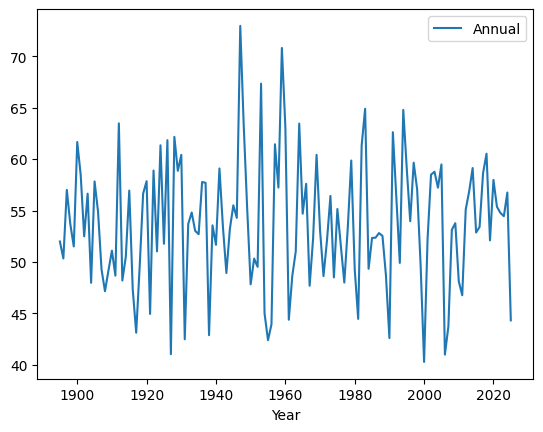

In [24]:
import pandas as pd                           # For working with data
pd.set_option("display.max_columns", None)    # Lets us see all columns of the data instead of just a preview
import geopandas as gpd                       # For working with spatial data
import numpy as np                            # For working with numbers
import matplotlib.pyplot as plt               # For making graphs
from datetime import date                     # For formatting dates
from PIL import Image                         # For getting and displaying images from links
import requests                               # For getting information from links
from io import BytesIO                        # For working with types of input and output
import seaborn as sns
import folium

# end date for data
endDate = "2024-12-31"

# florida counties boundaries as spacial data
flCounties = gpd.read_file('florida_counties.geojson')

# init folium basemap based on flCounties
map = folium.Map(location=[28.263363, -83.497652], tiles="CartoDB positron", zoom_start=7)

# Add each polygon as a marker on the map
for idx, row in flCounties.iterrows():
    # Simplify geometry to make the map load faster
    sim_geo = gpd.GeoSeries(row["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "blue"})
    folium.Popup(row["NAME"]).add_to(geo_j)
    geo_j.add_to(map)

#display(map)


FLrainPerM = pd.read_csv('Florida-Rainfall-Data-FSU.csv', encoding='latin1')

yearCol = 'Year'
annualCol = "Annual"

#FLrainPerM.columns
FLrainPerM.plot(x="Year", y="Annual", kind="line")
